In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Hanya mengambil fitur "Annual Income" dan "Spending Score"
X = dataset.iloc[:, 3:5]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
X.shape

(200, 2)

In [61]:
X.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [60]:
X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


<function matplotlib.pyplot.show(close=None, block=None)>

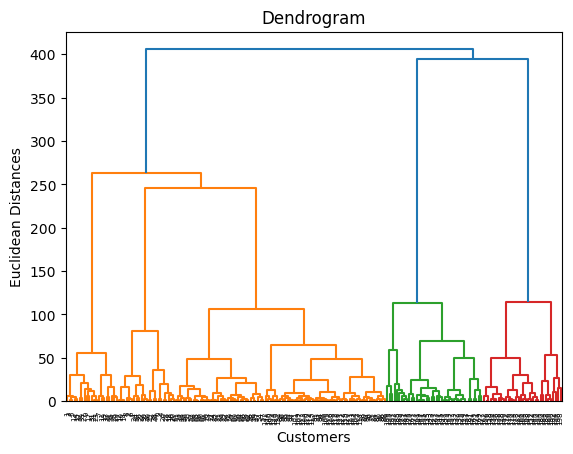

In [16]:
# Membuat dendrogram
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show

In [19]:
from sklearn.cluster import AgglomerativeClustering
#Menggunakan Cluster - 5
ac = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
ac.fit(X)

/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [20]:
ac.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [65]:
hasil_ac = X.copy()
hasil_ac2 = dataset.copy()
ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
ac.fit(X)
hasil_ac["cluster"] = ac.labels_
hasil_ac2["Customers ID"] = hasil_ac["cluster"]

hasil_ac2.head()

/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Customers ID
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


Text(0, 0.5, 'Frekuensi')

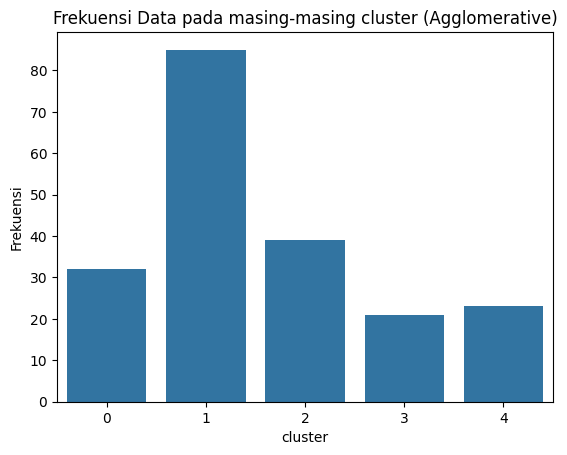

In [29]:
# Nilai untuk sumbu X dan Y
cluster_x1 = hasil_ac["cluster"].value_counts().index
cluster_y1 = hasil_ac["cluster"].value_counts().values
# Visualisasi
sns.barplot(x=cluster_x1, y=cluster_y1)
plt.title("Frekuensi Data pada masing-masing cluster (Agglomerative)")
plt.xlabel("cluster")
plt.ylabel("Frekuensi")

In [30]:
# Nilai fitur/variabel dari masing-masing cluster
ann_ac0 = hasil_ac[hasil_ac["cluster"] == 0].iloc[:, 0]
spend_ac0 = hasil_ac[hasil_ac["cluster"] == 0].iloc[:, 1]
ann_ac1 = hasil_ac[hasil_ac["cluster"] == 1].iloc[:, 0]
spend_ac1 = hasil_ac[hasil_ac["cluster"] == 1].iloc[:, 1]
ann_ac2 = hasil_ac[hasil_ac["cluster"] == 2].iloc[:, 0]
spend_ac2 = hasil_ac[hasil_ac["cluster"] == 2].iloc[:, 1]
ann_ac3 = hasil_ac[hasil_ac["cluster"] == 3].iloc[:, 0]
spend_ac3 = hasil_ac[hasil_ac["cluster"] == 3].iloc[:, 1]
ann_ac4 = hasil_ac[hasil_ac["cluster"] == 4].iloc[:, 0]
spend_ac4 = hasil_ac[hasil_ac["cluster"] == 4].iloc[:, 1]

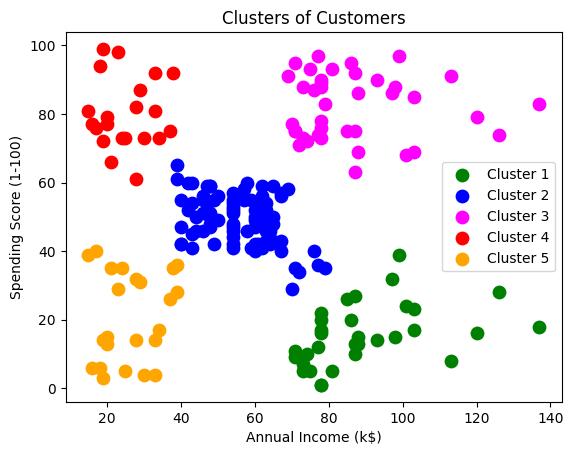

In [32]:
# VISUALISASI HASIL CLUSTERING (AGGLOMERATIVE)
plt.scatter(ann_ac0, spend_ac0, s = 80, c = "green", label = "Cluster 1")
plt.scatter(ann_ac1, spend_ac1, s = 80, c = "blue", label = "Cluster 2")
plt.scatter(ann_ac2, spend_ac2, s = 80, c = "magenta", label = "Cluster 3")
plt.scatter(ann_ac3, spend_ac3, s = 80, c = "red", label = "Cluster 4")
plt.scatter(ann_ac4, spend_ac4, s = 80, c = "orange", label = "Cluster 5")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()